In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
# Displaying basic info and first few rows to inspect the data
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(None,
    Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  )

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#Replcaing missing values for publisher by Unknown 
df.loc[:, 'Publisher'] = df['Publisher'].fillna('Unknown')

In [11]:
# Rechecking after replacing missing values of Publisher by Unknown 
missing_values = df.isnull().sum()
missing_values


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
# Drop rows with missing values 
df.dropna(inplace=True)

In [15]:
# Rechecking after droping for missing values of Year
missing_values = df.isnull().sum()
missing_values

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

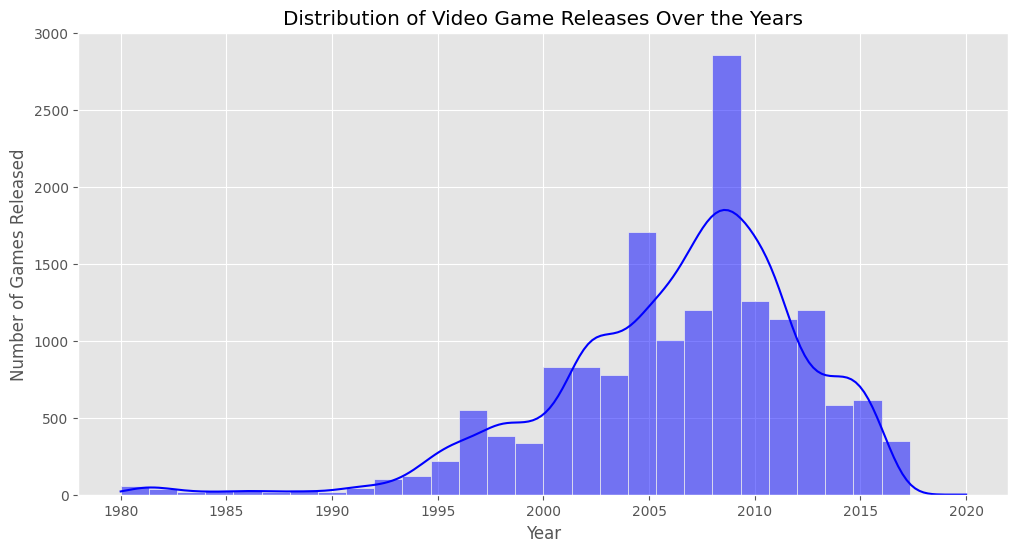

In [27]:
#Distribution of Video Game Releases Over the Years
# Setting plot style
plt.style.use('ggplot')

# Ploting by the number of games released each year
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=30, kde=True, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Video Game Releases Over the Years')
plt.show()

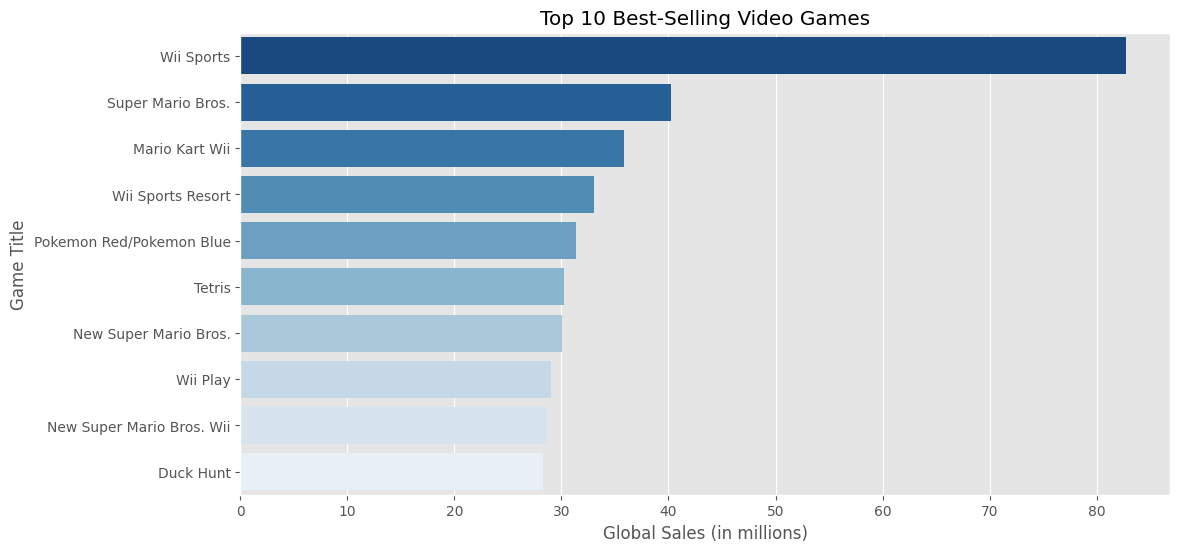

In [23]:
# Geting  the top 10 best-selling games
top_games = df.nlargest(10, 'Global_Sales')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x="Global_Sales", y="Name", hue="Name",palette="Blues_r",legend=False)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.title('Top 10 Best-Selling Video Games')
plt.show()


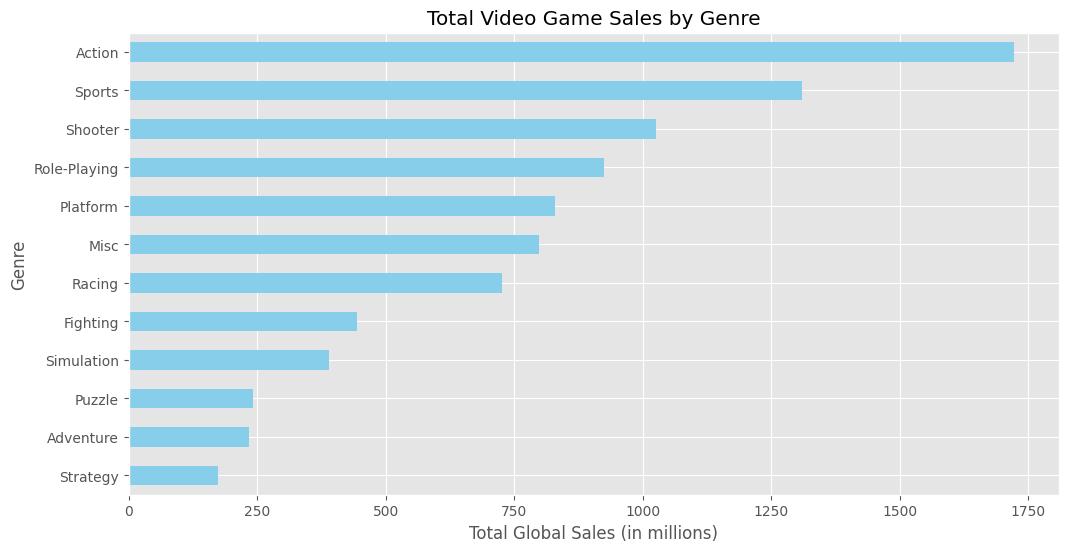

In [29]:
# Group by Genre and sum global sales
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values()

# Plot
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='barh', color='skyblue')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Total Video Game Sales by Genre')
plt.show()



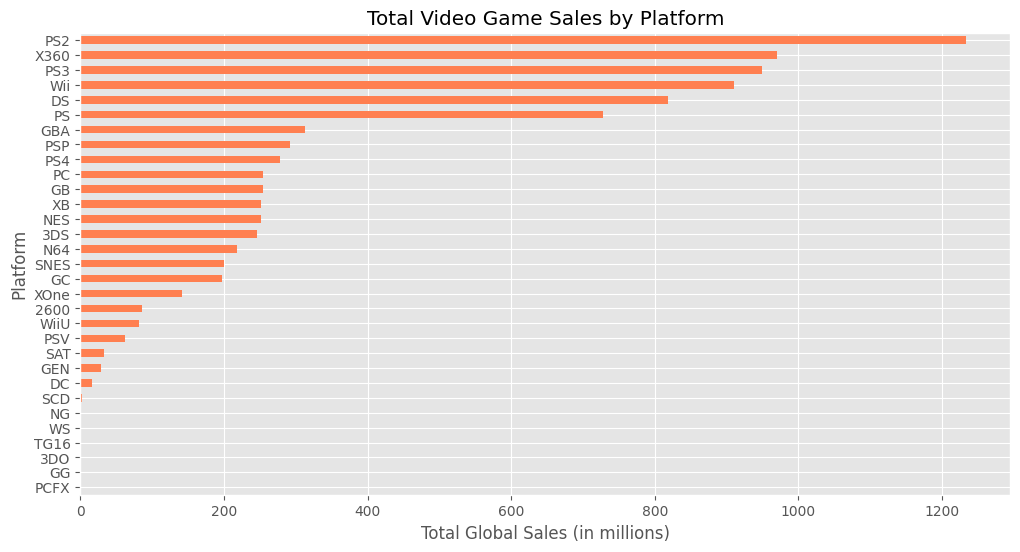

In [31]:
# Group by Platform and sum sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values()

# Plot
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='barh', color='coral')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Platform')
plt.title('Total Video Game Sales by Platform')
plt.show()


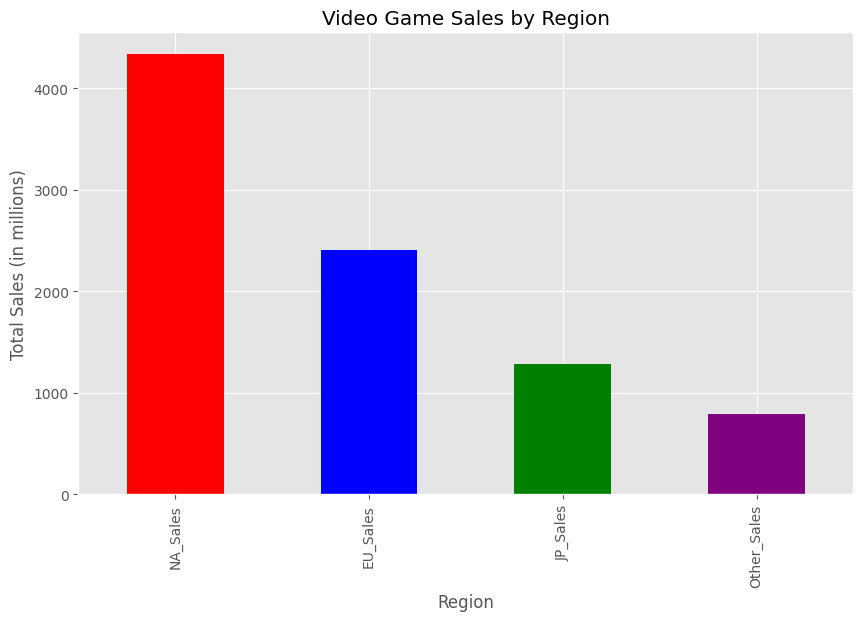

In [40]:
# Aggregate total sales per region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=['red', 'blue', 'green', 'purple'])
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.title('Video Game Sales by Region')
plt.show()


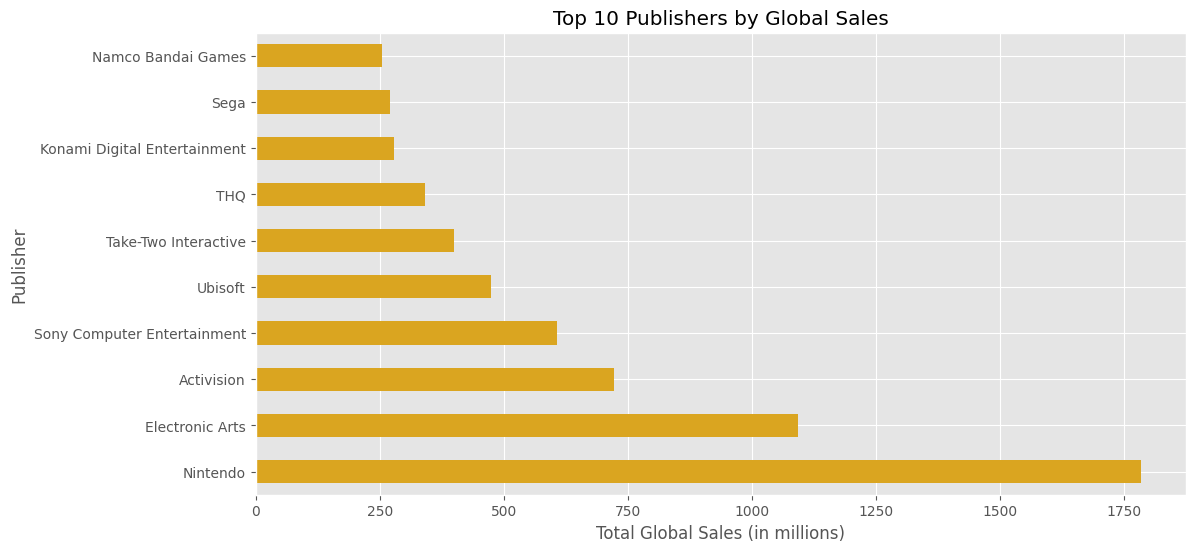

In [42]:
# Group by Publisher and sum sales, then take the top 10
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='barh', color='goldenrod')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Global Sales')
plt.show()


In [50]:
# Saving cleaned dataset for visualizations in Power BI
df.to_csv('vgsales_cleaned.csv', index=False)
